## isgri_image

In [33]:
import numpy as np
import json
from datetime import datetime
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from scipy.optimize import curve_fit
from astropy.time import Time
from datetime import datetime
import matplotlib.pyplot as plt

Tests

/tmp/ipykernel_11380/623762099.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_0_intensity_data), cmap='viridis')
/tmp/ipykernel_11380/623762099.py:24: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_0_intensity_data), cmap='viridis')
/tmp/ipykernel_11380/623762099.py:42: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_72_intensity_data), cmap='viridis')
/tmp/ipykernel_11380/623762099.py:42: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_72_intensity_data), cmap='viridis')


Image 0 WCS reference: 191.178115844727 0.152548849582672
Image 72 WCS reference: 188.832626342773 -4.9811053276062
=== Image 0 WCS Information ===
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 191.17811584473 0.15254884958267 
CRPIX : 263.0 263.0 
PC1_1 PC1_2  : -0.082286253915591 0.0 
PC2_1 PC2_2  : 0.0 0.082286253915591 
CDELT : 1.0 1.0 
NAXIS : 0  0

=== Image 0 Header ===
{'BASETYPE': 'DAL_ARRAY', 'BITPIX': -32, 'BSCALE': 1, 'BUNIT': 'counts/sec', 'BZERO': 0, 'CD1_1': -0.0822862539155913, 'CD1_2': 0.0, 'CD2_1': 0.0, 'CD2_2': 0.0822862539155913, 'CHANMAX': 30, 'CHANMIN': 15, 'CHANTYPE': 'PI', 'CHECKSUM': 'OFkfOEjcOEjcOEjc', 'COMMENT': 'STAMP :', 'CONFIGUR': 'osa_2021-08-27T14:27:00', 'CREATOR': 'ii_skyimage 5.4.4', 'CRPIX1': 263.0, 'CRPIX2': 263.0, 'CRVAL1': 191.178115844727, 'CRVAL2': 0.152548849582672, 'CTYPE1': 'RA---TAN', 'CTYPE2': 'DEC--TAN', 'CUNIT1': 'deg', 'CUNIT2': 'deg', 'DATASUM': '951558425', 'DATE': '2025-03-23T17:22:59', 'DATE-END': '2003-

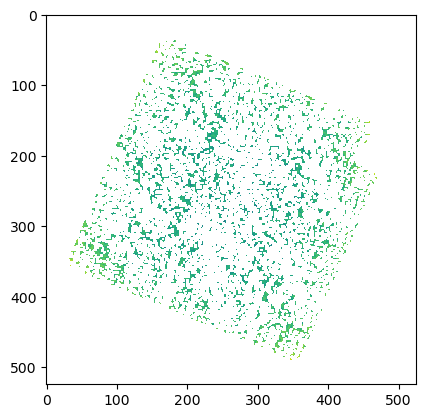

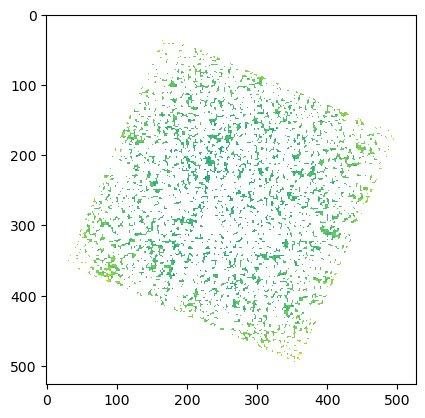

In [44]:
npz = np.load("../data/jupiter_img_data.npz", allow_pickle=True)
jupiter_ra = np.loadtxt("../data/2003-01-01_2025-01-01.txt", delimiter=",", usecols=(-2), skiprows=1)
jupiter_dec = np.loadtxt("../data/2003-01-01_2025-01-01.txt", delimiter=",", usecols=(-1), skiprows=1)
start = np.loadtxt("../data/2003-01-01_2025-01-01.txt", delimiter=",", usecols=(2), skiprows=1)
isot_start_times = Time(start, format='mjd').isot
year_months = [st[:7] for st in isot_start_times]

# Image 0 
img_0_header = json.loads(npz[f"header_0"].item())
img_0_wcs = WCS(json.loads(npz[f"wcs_0"].item()))
img_0_intensity_data = npz[f"intensity_0"]
timestamp_0 = datetime.strptime(img_0_header['DATE-OBS'], "%Y-%m-%dT%H:%M:%S")
year_month_0 = timestamp_0.strftime("%Y-%m")
ym_0 = [datetime.strptime(date_str, "%Y-%m") for date_str in year_months]
ym_pairs_0 = [(dt.year, dt.month) for dt in ym_0]
timestamp_pair_0 = (timestamp_0.year, timestamp_0.month)
index_for_time_0 = ym_pairs_0.index(timestamp_pair_0)
current_ra_0 = jupiter_ra[index_for_time_0]
current_dec_0 = jupiter_dec[index_for_time_0]
x_0, y_0 = img_0_wcs.world_to_pixel(SkyCoord(ra=current_ra_0, dec=current_dec_0, unit="deg"))
x_int_0, y_int_0 = np.round(x_0).astype(int), np.round(y_0).astype(int)

plt.figure()
plt.imshow(np.log10(img_0_intensity_data), cmap='viridis')

# Image 72
img_72_header = json.loads(npz[f"header_72"].item())
img_72_wcs = WCS(json.loads(npz[f"wcs_72"].item()))
img_72_intensity_data = npz[f"intensity_72"]
timestamp_72 = datetime.strptime(img_72_header['DATE-OBS'], "%Y-%m-%dT%H:%M:%S")
year_month_72 = timestamp_72.strftime("%Y-%m")
ym_72 = [datetime.strptime(date_str, "%Y-%m") for date_str in year_months]
ym_pairs_72 = [(dt.year, dt.month) for dt in ym_72]
timestamp_pair_72 = (timestamp_72.year, timestamp_72.month)
index_for_time_72 = ym_pairs_72.index(timestamp_pair_72)
current_ra_72 = jupiter_ra[index_for_time_72]
current_dec_72 = jupiter_dec[index_for_time_72]
x_72, y_72 = img_72_wcs.world_to_pixel(SkyCoord(ra=current_ra_72, dec=current_dec_72, unit="deg"))
x_int_72, y_int_72 = np.round(x_72).astype(int), np.round(y_72).astype(int)

plt.figure()
plt.imshow(np.log10(img_72_intensity_data), cmap='viridis')

# Prints
print("Image 0 WCS reference:", img_0_header["CRVAL1"], img_0_header["CRVAL2"])
print("Image 72 WCS reference:", img_72_header["CRVAL1"], img_72_header["CRVAL2"])

print("=== Image 0 WCS Information ===")
print(img_0_wcs)

print("\n=== Image 0 Header ===")
print(img_0_header)

print("\n=== Image 0 Coordinates ===")
print(f"Timestamp: {timestamp_0}")
print(f"Year-Month: {year_month_0}")
print(f"Index for Time: {index_for_time_0}")
print(f"Jupiter RA: {current_ra_0}, Jupiter DEC: {current_dec_0}")
print(f"Pixel Coordinates: ({x_0}, {y_0})")
print(f"Rounded Pixel Coordinates: ({x_int_0}, {y_int_0})")

print("\n\n=== Image 72 WCS Information ===")
print(img_72_wcs)

print("\n=== Image 72 Header ===")
print(img_72_header)

print("\n=== Image 72 Coordinates ===")
print(f"Timestamp: {timestamp_72}")
print(f"Year-Month: {year_month_72}")
print(f"Index for Time: {index_for_time_72}")
print(f"Jupiter RA: {current_ra_72}, Jupiter DEC: {current_dec_72}")
print(f"Pixel Coordinates: ({x_72}, {y_72})")
print(f"Rounded Pixel Coordinates: ({x_int_72}, {y_int_72})")


In [43]:
Time(52795.5098678759, format='mjd').isot

'2003-06-05T12:14:12.584'

First load Jupiter's count rates file, which was acquired in JupiterLongTerm.ipynb

In [31]:
load_from_npz = True

if load_from_npz: 

    # Load the saved data
    data = np.load("../data/jupiter_img_data.npz", allow_pickle=True)
    jupiter_ra = np.loadtxt("../data/2003-01-01_2025-01-01.txt", delimiter=",", usecols=(-2), skiprows=1)
    jupiter_dec = np.loadtxt("../data/2003-01-01_2025-01-01.txt", delimiter=",", usecols=(-1), skiprows=1)
    start = np.loadtxt("../data/2003-01-01_2025-01-01.txt", delimiter=",", usecols=(2), skiprows=1)
    isot_start_times = Time(start, format='mjd').isot
    year_months = [st[:7] for st in isot_start_times]

    # Initialize lists
    jupiter_countrates = []
    jupiter_variances = []
    annular_counts = []
    annular_variances = []
    obs_start_dates = []
    obs_end_dates = []
    offsets = []
    fixed_psf_counts = []
    psf_counts = []
    fixed_psf_errors = []
    psf_errors = []

    for i in range(len(data.files) // 4):  # Assuming 4 entries per image (header, WCS, intensity, variance)
        try:
            # Load header and WCS information
            header = json.loads(data[f"header_{i}"].item())
            wcs = WCS(json.loads(data[f"wcs_{i}"].item()))

            # Load intensity and variance data
            intensity_data = data[f"intensity_{i}"]
            variance_data = data[f"variance_{i}"]

            # Extract time information
            timestamp = datetime.strptime(header['DATE-OBS'], "%Y-%m-%dT%H:%M:%S")
            year_month = timestamp.strftime("%Y-%m")
            ym = [datetime.strptime(date_str, "%Y-%m") for date_str in year_months]
            ym_pairs = [(dt.year, dt.month) for dt in ym]
            timestamp_pair = (timestamp.year, timestamp.month)
            index_for_time = ym_pairs.index(timestamp_pair)

            current_ra = jupiter_ra[index_for_time]
            current_dec = jupiter_dec[index_for_time]

            # Convert world coordinates to pixel coordinates
            x, y = wcs.world_to_pixel(SkyCoord(ra=current_ra, dec=current_dec, unit="deg"))
            x_int, y_int = np.round(x).astype(int), np.round(y).astype(int)

            if not (0 <= x_int < intensity_data.shape[1] and 0 <= y_int < intensity_data.shape[0]):
                raise IndexError(f"Index ({x_int}, {y_int}) out of bounds")

            # Compute offset between pointing and Jupiter's actual position
            pointing = SkyCoord(ra=header['CRVAL1'], dec=header['CRVAL2'], unit=("deg", "deg"))
            jupiter_coords = SkyCoord(ra=current_ra, dec=current_dec, unit=("deg", "deg"))
            offset = pointing.separation(jupiter_coords).deg

            # Extract count rate and variance at Jupiter's position
            jupiter_countrate = intensity_data[y_int, x_int]
            jupiter_variance = variance_data[y_int, x_int]

            jupiter_countrates.append(jupiter_countrate)
            jupiter_variances.append(jupiter_variance)
            obs_start_dates.append(header['DATE-OBS'])
            obs_end_dates.append(header['DATE-END'])
            offsets.append(offset)

            # Compute annular statistics
            annular_var = []
            annular_rate = []

            for x in range(x_int - 5, x_int + 5):
                for y in range(y_int - 5, y_int + 5):
                    annular_var.append(variance_data[y, x])
                    annular_rate.append(intensity_data[y, x])

            annular_var = np.mean(annular_var)
            annular_rate = np.mean(annular_rate)
            annular_var -= variance_data[y_int, x_int]
            annular_rate -= intensity_data[y_int, x_int]

            annular_variances.append(annular_var)
            annular_counts.append(annular_rate)

            # Define Gaussian fitting functions
            def Gaussian2D(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
                x, y = xy
                xo = float(xo)
                yo = float(yo)    
                a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
                b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
                c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
                g = offset + amplitude*np.exp(- (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
                return g.ravel()

            def Gaussian2D_fixed(xy, amplitude, xo, yo):
                return Gaussian2D(xy, amplitude, xo, yo, np.sqrt(jupiter_variance), np.sqrt(jupiter_variance), 0, 0)

            # Generate meshgrid for fitting
            x = np.arange(0, intensity_data.shape[1])
            y = np.arange(0, intensity_data.shape[0])
            x, y = np.meshgrid(x, y)

            # Fit PSF model
            popt, pcov = curve_fit(Gaussian2D_fixed, (x, y), intensity_data.ravel(), 
                                p0=[jupiter_countrate, x_int, y_int])
            popt2, pcov2 = curve_fit(Gaussian2D, (x, y), intensity_data.ravel(), 
                                    p0=[jupiter_countrate, x_int, y_int, np.sqrt(jupiter_variance), 
                                        np.sqrt(jupiter_variance), 0, 0])

            fixed_psf_counts.append(popt[0])
            psf_counts.append(popt2[0])
            fixed_psf_errors.append(np.sqrt(np.diag(pcov))[0])
            psf_errors.append(np.sqrt(np.diag(pcov2))[0])

        except Exception as e:
            print(f"Error in image {i} ({header.get('DATE-OBS', 'Unknown')}): {e}")
            continue
    errors = np.sqrt(jupiter_variances)
    annular_errors = np.sqrt(annular_variances)

    jupiter_countrates = jupiter_countrates[2:]
    jupiter_variances = jupiter_variances[2:]
    annular_counts = annular_counts[2:]
    annular_variances = annular_variances[2:]
    obs_start_dates = obs_start_dates[2:]
    obs_end_dates = obs_end_dates[2:]
    offsets = offsets[2:]
    fixed_psf_counts = fixed_psf_counts[2:]
    psf_counts = psf_counts[2:]
    fixed_psf_errors = fixed_psf_errors[2:]
    psf_errors = psf_errors[2:]
    errors = errors[2:]
    annular_errors = annular_errors[2:]
    
else:
    input_filename = "../data/jupiter_longterm_img_data_15_30.txt"

    data = np.genfromtxt(input_filename, delimiter=",", dtype=None, names=True, encoding=None)

    obs_start_dates = data["Obs_Start_Date"]
    mask = ~np.isnan(data["Count_Rate"]) & (np.arange(len(data)) >= 2)

    def mask_data(data):
        return np.array(data)[mask]

    jupiter_countrates = mask_data(data["Count_Rate"])
    jupiter_variances = mask_data(data["Variance"])
    errors = np.sqrt(jupiter_variances)
    offsets = mask_data(data["Angular_offset"])
    annular_counts = mask_data(data["Annular_Count_Rate"])
    annular_variances = mask_data(data["Annular_Variance"])
    annular_errors = np.sqrt(annular_variances)
    psf_counts = mask_data(data["PSF_Count_Rate"])
    psf_errors = mask_data(data["PSF_Count_Rate_Error"])
    fixed_psf_counts = mask_data(data["PSF_Count_Rate_Fixed"])
    fixed_psf_errors = mask_data(data["PSF_Count_Rate_Error_Fixed"])
    obs_start_dates = mask_data(data["Obs_Start_Date"])
    obs_end_dates = mask_data(data["Obs_End_Date"])


/tmp/ipykernel_11380/3320096511.py:108: OptimizeWarning: Covariance of the parameters could not be estimated
  popt2, pcov2 = curve_fit(Gaussian2D, (x, y), intensity_data.ravel(),
/home/interstellxr/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:499: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T


Error in image 72 (2003-07-07T00:40:31): Index (-11467, -4719) out of bounds
Error in image 73 (2003-07-07T08:33:11): Index (-8501, -3465) out of bounds
Error in image 74 (2003-07-07T09:32:12): Index (-10538, -4358) out of bounds
Error in image 75 (2004-06-23T22:50:59): Index (-9715, -4017) out of bounds
Error in image 76 (2004-12-21T00:23:14): Index (-11437, -4760) out of bounds
Error in image 77 (2004-12-23T15:15:12): Index (-9094, -3732) out of bounds
Error in image 78 (2004-12-23T20:33:32): Index (-11434, -4759) out of bounds
Error in image 79 (2004-12-29T09:26:18): Index (-11440, -4762) out of bounds
Error in image 80 (2005-01-07T08:50:50): Index (-839, -253) out of bounds
Error in image 81 (2005-05-31T07:50:19): Index (-822, -233) out of bounds
Error in image 82 (2005-05-31T08:27:12): Index (-812, -203) out of bounds
Error in image 83 (2005-05-31T09:03:54): Index (-803, -173) out of bounds
Error in image 84 (2005-05-31T09:40:37): Index (-796, -144) out of bounds
Error in image 85

/tmp/ipykernel_11380/3320096511.py:121: RuntimeWarning: invalid value encountered in sqrt
  annular_errors = np.sqrt(annular_variances)


Do some plotting

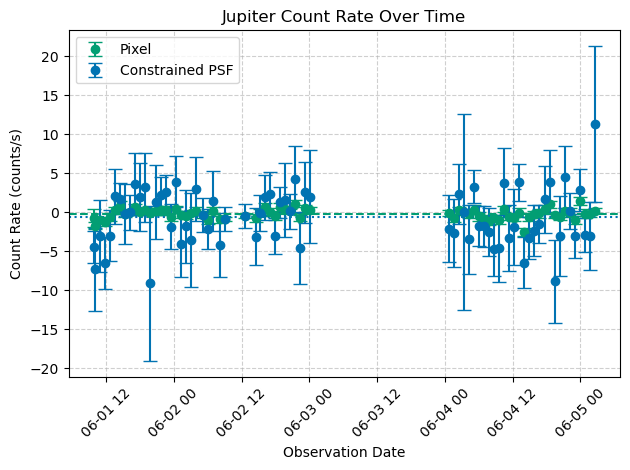

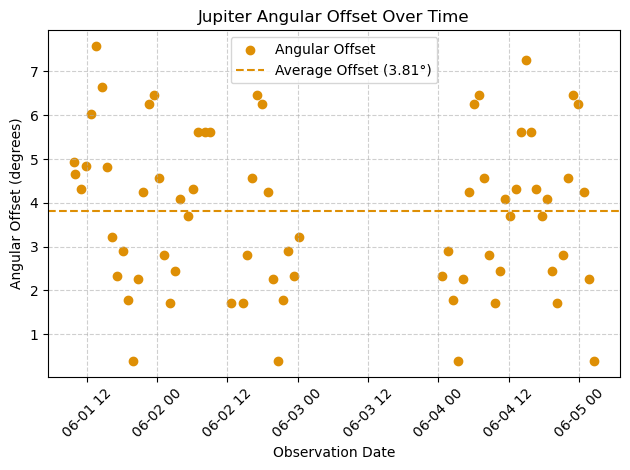

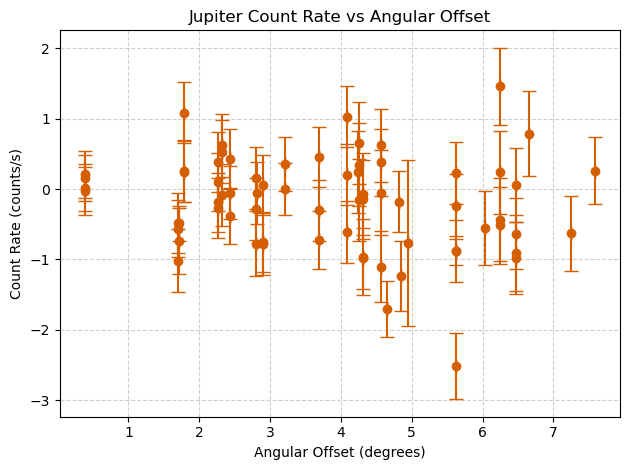

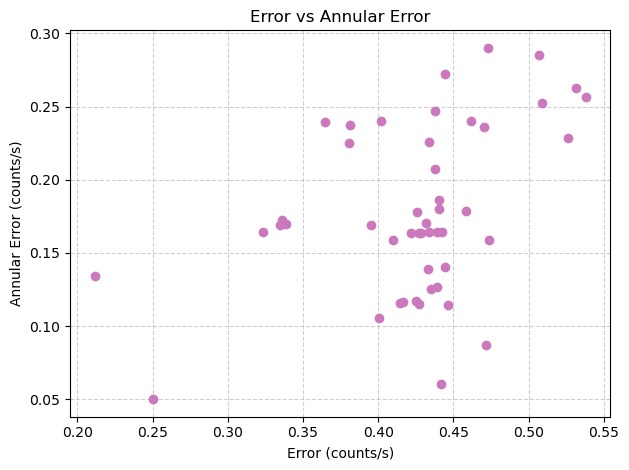

In [ ]:
obs_times = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in obs_start_dates]

# Calculate average and standard deviation
avg_count_rate = np.mean(jupiter_countrates)
std_count_rate = np.std(jupiter_countrates)
avg_psfs = np.mean(psf_counts)
std_psfs = np.std(psf_counts)
avg_fixed_psfs = np.mean(fixed_psf_counts)
std_fixed_psfs = np.std(fixed_psf_counts)

avg_offset = np.mean(offsets)
std_offset = np.std(offsets)

import seaborn as sns

# Use a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Plot count rate over time with errorbars and std region
plt.figure()
plt.errorbar(obs_times, jupiter_countrates, yerr=errors, color=colors[2], fmt='o', capsize=5, label='Pixel')
plt.errorbar(obs_times, fixed_psf_counts, yerr=fixed_psf_errors, color=colors[0], fmt='o', capsize=5, label='Constrained PSF')
plt.axhline(avg_count_rate, color=colors[2], linestyle='--')
plt.axhline(avg_fixed_psfs, color=colors[0], linestyle=':')
plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("Jupiter Count Rate Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

# Plot angular offset from pointing center over time with std region
plt.figure()
plt.scatter(obs_times, offsets, color=colors[1], label='Angular Offset')
plt.axhline(avg_offset, color=colors[1], linestyle='--', label=f'Average Offset ({avg_offset:.2f}°)')
plt.xlabel("Observation Date")
plt.ylabel("Angular Offset (degrees)")
plt.title("Jupiter Angular Offset Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

# Plot count rate vs angular offset
plt.figure()
plt.errorbar(offsets, jupiter_countrates, xerr=0, yerr=errors, fmt='o', capsize=5, color=colors[3])
plt.xlabel("Angular Offset (degrees)")
plt.ylabel("Count Rate (counts/s)")
plt.title("Jupiter Count Rate vs Angular Offset")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Plot error vs annular error
plt.figure()
plt.errorbar(errors, annular_errors, fmt='o', capsize=5, color=colors[4])
plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Calculate weighted mean

Weighted jupiter Count Rate: -0.22 +- 0.05


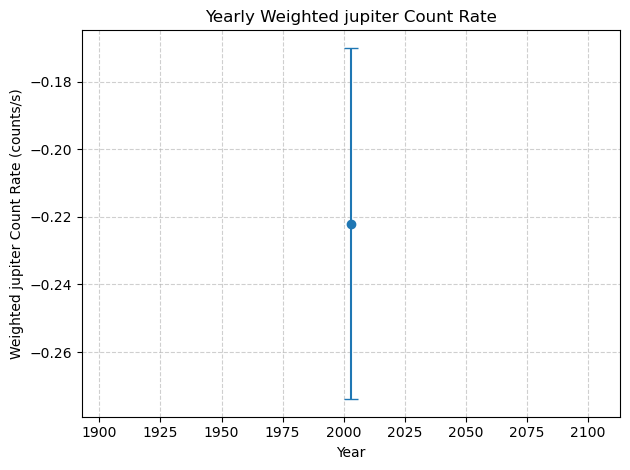

In [9]:
from collections import defaultdict

weights=1/jupiter_variances

# Total weighted average
weighted_jupiter_countrate = np.average(jupiter_countrates, weights=weights)
weighted_jupiter_countrate_std = np.sqrt(1 / np.sum(weights))
print(f"Weighted jupiter Count Rate: {weighted_jupiter_countrate:.2f} +- {weighted_jupiter_countrate_std:.2f}")

# Yearly weighted average
yearly_data = defaultdict(list)

for date, count_rate, weight in zip(obs_times, jupiter_countrates, weights):
    year = date.year
    yearly_data[year].append((count_rate, weight))

yearly_weighted_means = {}
yearly_weighted_stds = {}

for year, values in yearly_data.items():
    count_rates, year_weights = zip(*values)
    count_rates = np.array(count_rates)
    year_weights = np.array(year_weights)
    yearly_weighted_means[year] = np.average(count_rates, weights=year_weights)
    yearly_weighted_stds[year] = np.sqrt(1 / np.sum(year_weights))


plt.figure()
plt.errorbar(list(yearly_weighted_means.keys()), list(yearly_weighted_means.values()), yerr=list(yearly_weighted_stds.values()), fmt='o', capsize=5)
plt.xlabel("Year")
plt.ylabel("Weighted jupiter Count Rate (counts/s)")
plt.title("Yearly Weighted jupiter Count Rate")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()


## isgri_lc data

Load the data

In [ ]:
lc_input_filename = "../data/jupiter_longterm_lc_data.txt"

lc_data = np.genfromtxt(lc_input_filename, delimiter=",", dtype=None, names=True, encoding=None)

lc_obs_start_dates = data["Obs_Start_Date"]
lc_obs_end_dates = data["Obs_End_Date"]
jupiter_lc_countrates = data["Count_Rate"]
jupiter_lc_errors = data["Error"]

Plotting

In [ ]:
lc_times = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in lc_obs_start_dates]

lc_rates = np.array(jupiter_lc_countrates)
lc_err = np.array(jupiter_lc_errors)

plt.figure()
plt.errorbar(lc_times, lc_rates, yerr=lc_err, fmt='o', capsize=5, label="jupiter Count Rate")
plt.xlabel("Observation Date")
plt.ylabel("Count Rate")
plt.title("jupiter Count Rate Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

## Comparison

In [ ]:
plt.figure()

plt.errorbar(obs_times, jupiter_countrates, yerr=errors, fmt='o', capsize=5, label="Images")
plt.errorbar(lc_times, lc_rates, yerr=lc_err, fmt='o', capsize=5, label="Light curves")

plt.xlabel("Observation Date")
plt.ylabel("Count Rate")
plt.title("jupiter Count Rate Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()